In [1]:
# Imports

import math
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,os,calendar,csv,time

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,LSTM,Conv2D,Dropout,BatchNormalization,Input,Concatenate,Add,Activation,MaxPooling2D,AveragePooling2D
import keras.backend as K

from sklearn import preprocessing as pp

from sklearn.cluster import KMeans,MeanShift
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import BayesianRidge,Lasso,LinearRegression,SGDClassifier,SGDRegressor
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,RadiusNeighborsClassifier,RadiusNeighborsRegressor,NearestNeighbors
from sklearn.manifold import Isomap,TSNE
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.neural_network import BernoulliRBM,MLPClassifier,MLPRegressor
from sklearn.decomposition import FactorAnalysis,KernelPCA,PCA,MiniBatchSparsePCA,FastICA
from sklearn.preprocessing import CategoricalEncoder,KBinsDiscretizer,LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler

from xgboost import XGBClassifier,XGBRegressor

import gym
import pygame
from pygame.locals import *

import pickle,h5py,json

import pandas_datareader as pdr
import urllib
from bs4 import BeautifulSoup
import iexfinance as iex
from iexfinance.stocks import get_historical_data
from scipy.signal import resample,correlate
from scipy import fftpack
from lmfit import Model

warnings.filterwarnings('ignore')
sns.set()
plt.xkcd()

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
start_date = datetime.datetime(2014,1,1)
end_date = datetime.datetime(2017,1,1)

with open('Documents\stock_symb.txt','r') as f:
    lines = f.readlines()
content = [line.strip() for line in lines]
tickers = [content[i] for i in list(np.random.permutation(np.arange(len(content))))]

In [41]:
ticker_set = tickers[:100]
datesequ = get_historical_data(ticker_set[0],start=start_date,end=end_date,output_format='pandas').index

DATA = []
DF = []

ctr = 0
for ticker in ticker_set:

    print('Processing %d/%d'%(ctr,len(ticker_set)))
    ctr += 1
    try:
        df = get_historical_data(ticker,start=start_date,end=end_date,output_format='pandas')
    except:
        continue
    if df.shape[0]!=len(datesequ): continue
    
    open_price = df['open'].values.reshape(1,-1)
    high_price = df['high'].values.reshape(1,-1)
    low_price = df['low'].values.reshape(1,-1)
    close_price = df['close'].values.reshape(1,-1)
    volume = df['volume'].values.reshape(1,-1)
    
    if open_price.shape[1]==0: continue
    if high_price.shape[1]==0: continue
    if low_price.shape[1]==0: continue
    if close_price.shape[1]==0: continue
    if volume.shape[1]==0: continue
    if any([math.isnan(float(k)) for k in list(open_price[0])]): continue
    if any([math.isnan(float(k)) for k in list(high_price[0])]): continue
    if any([math.isnan(float(k)) for k in list(low_price[0])]): continue
    if any([math.isnan(float(k)) for k in list(close_price[0])]): continue
    if any([math.isnan(float(k)) for k in list(volume[0])]): continue
    
    DF.append(df)

Processing 0/100
Processing 1/100
Processing 2/100
Processing 3/100
Processing 4/100
Processing 5/100
Processing 6/100
Processing 7/100
Processing 8/100
Processing 9/100
Processing 10/100
Processing 11/100
Processing 12/100
Processing 13/100
Processing 14/100
Processing 15/100
Processing 16/100
Processing 17/100
Processing 18/100
Processing 19/100
Processing 20/100
Processing 21/100
Processing 22/100
Processing 23/100
Processing 24/100
Processing 25/100
Processing 26/100
Processing 27/100
Processing 28/100
Processing 29/100
Processing 30/100
Processing 31/100
Processing 32/100
Processing 33/100
Processing 34/100
Processing 35/100
Processing 36/100
Processing 37/100
Processing 38/100
Processing 39/100
Processing 40/100
Processing 41/100
Processing 42/100
Processing 43/100
Processing 44/100
Processing 45/100
Processing 46/100
Processing 47/100
Processing 48/100
Processing 49/100
Processing 50/100
Processing 51/100
Processing 52/100
Processing 53/100
Processing 54/100
Processing 55/100
Pr

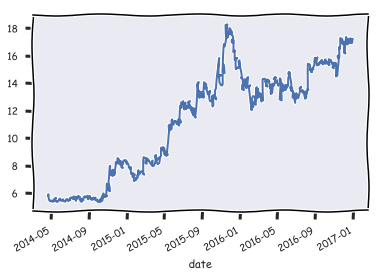

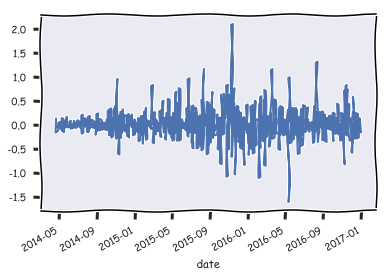

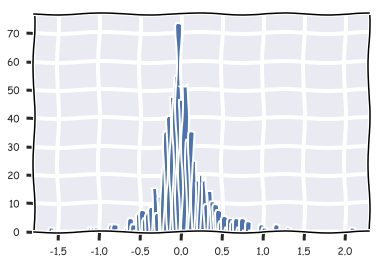

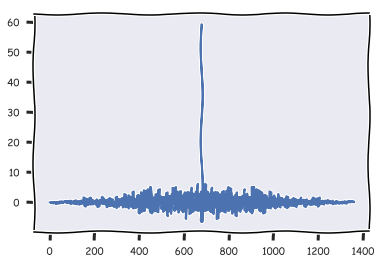

In [4]:
idx = 1
fname = 'open'

DF[idx][fname].plot()
plt.show()

DF[idx][fname].diff().plot()
plt.show()

DF[idx][fname].diff().hist(bins=100)
plt.show()

plt.plot(correlate(DF[idx][fname].diff().values[1:],DF[idx][fname].diff().values[1:]))
plt.show()

In [52]:
fname = 'open'

M = []
S = []

H = []
B = []
for k in range(len(DF)):
    
    delta = DF[k][fname].diff()[1:].values
    
    m,s = np.mean(delta),np.var(delta)
    h,b = np.histogram(delta,bins=100)
    
    M.append(m)
    S.append(s)
    
    H.append(h)
    B.append(b[1:])

H = np.stack(H,axis=0)
B = np.stack(B,axis=0)

In [54]:
dd = pd.DataFrame({
    'Means':M,
    'Vars':S
})

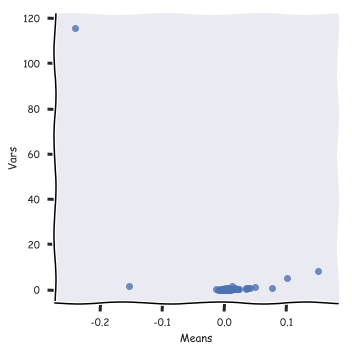

In [57]:
sns.lmplot(x='Means',y='Vars',data=dd,fit_reg=False)